In [757]:
#import Libraries 
import pandas as pd

import seaborn as sns
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from PIL import Image
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize 
lemmatizer = nltk.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
from nltk.util import ngrams
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ezzard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ezzard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [758]:
#get data form cvs files and convert into a 
nbc = "nbc_first_pres_debate.csv"
fox = "foxnews_first_pres_debate.csv"
cspan = "cspan_first_pres_debate.csv"


In [759]:
#convert the csv files into data frames
def clean_data(csv_file):
    data = pd.read_csv(csv_file)
    data_comments = data['original_comment']
    data= data_comments.to_frame()
    data['original_comment'] = data['original_comment']. apply(lambda x: x.lower())
    tokenized_doc = data['original_comment'].apply(lambda x: x.split())
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
    tokenized_doc = tokenized_doc.apply(lambda x: lemmatize(x))
    detokenized_doc = tokenized_doc.apply(lambda x: ' '.join(x))
    data['original_comment'] = detokenized_doc
    
    
    return data


In [760]:
nbc_data = clean_data(nbc)
fox_data = clean_data(fox)
cspan_data = clean_data(cspan)


# Exploratory Data Analysis
suppose we want to know which words dominated each comment section
how do we do this? We create a corpus which gets rid of the lines and just compiles all of the words in the entire comment section. Then from there we can visualize which words were presented the most in each comment section 


In [761]:
def create_corpus(dframe):
    corpus=[]
    new= dframe['original_comment'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    return corpus

In [762]:
nbc_corpus = create_corpus(nbc_data)
cspan_corpus = create_corpus(cspan_data)
fox_corpus = create_corpus(fox_data)


In [763]:
nbc_corpus

['trump',
 'remembered',
 'one',
 'term',
 'loser',
 'impeached',
 'twice',
 "who's",
 'inauguration',
 '2:9:00',
 'trump',
 'condemn',
 'white',
 'supremacist',
 'need',
 'mad',
 'bodyguard',
 'country',
 'cave',
 'self',
 'go',
 'inner',
 'city',
 'send',
 'kamalah',
 'safer',
 'don’t',
 'let',
 'joe',
 'biden',
 'go',
 'inner',
 'city',
 'hahah',
 'ridiculous',
 'omg',
 'lies!',
 'biden',
 'prison',
 'it’s',
 'proven',
 'anything',
 'presidential',
 'vote',
 'rigging.',
 'https://www.bing.com/videos/search?q=italydidit&view=detail&mid=dfe094c19a6936660f84dfe094c19a6936660f84&form=vire',
 '1:24:58',
 'he’s',
 'narcissistic',
 'conceited,',
 'thought',
 'closing',
 'border',
 'china',
 'giant',
 'step,',
 'new',
 'zealand',
 'australia',
 'closed',
 'border',
 'whole',
 'world',
 'covid19',
 'started',
 'spiraling',
 'control',
 'clown',
 'believe',
 'word',
 'come',
 "donald's",
 'lip',
 'по',
 'любому',
 'победа',
 'буде',
 'за',
 'трампа!весь',
 'мир',
 'с',
 'трампом!',
 'courageo

In [764]:
def plot_top_non_stopwords_barchart(corpus):
    #counter function counts all of the words in our corpus
    counter=Counter(corpus)
    #create a variable to get the words that appear the most
    most=counter.most_common()
    #now we plot our findings
    x, y=[], []
    for word,count in most[:20]:
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    

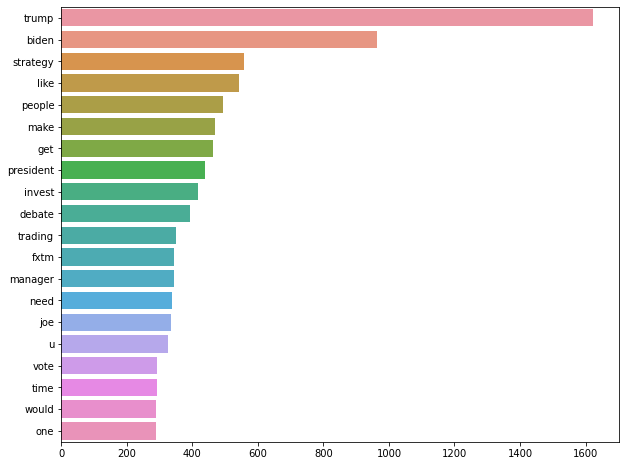

In [765]:
plot_top_non_stopwords_barchart(nbc_corpus)


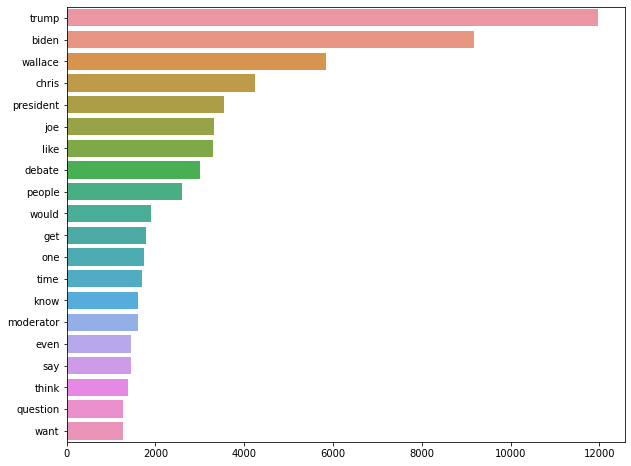

In [766]:
plot_top_non_stopwords_barchart(fox_corpus)


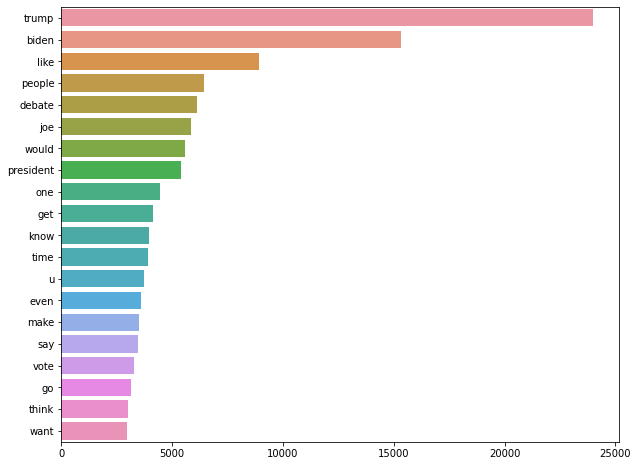

In [767]:
plot_top_non_stopwords_barchart(cspan_corpus)

In [768]:
#here we gain some insight. Throughout the all of the comment sections it seems that trumps name dominated bidens. Was this a good thing or a bad thing? 

In [769]:
#suppose we want to know more than just singular. Say we want to see phrases. How can we go about doing this?

In [770]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [771]:
def plot_top_ngrams_barchart(text, n=2):
    


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

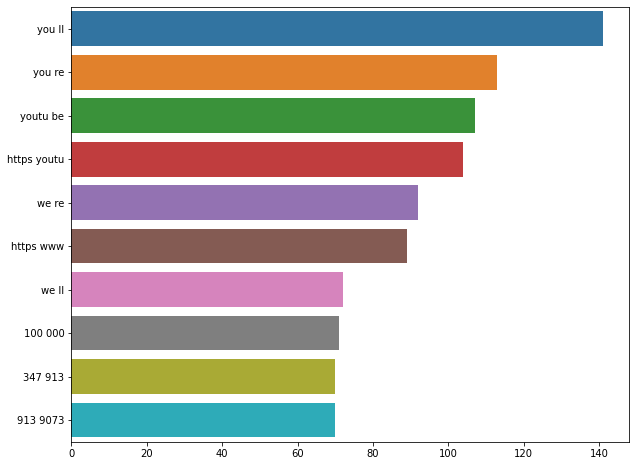

In [772]:
plot_top_ngrams_barchart(nbc_corpus, n=2)


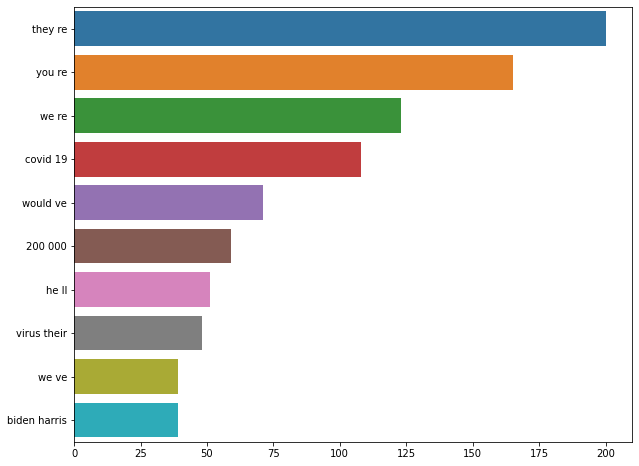

In [773]:
plot_top_ngrams_barchart(fox_corpus, n=2)


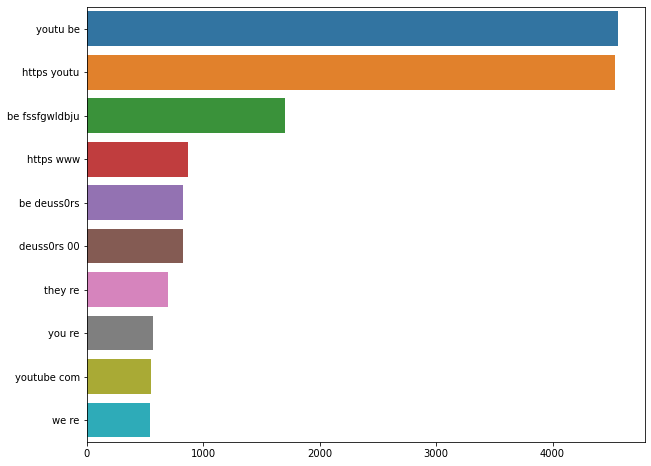

In [774]:
plot_top_ngrams_barchart(cspan_corpus, n=2)

Sentiment analysis 
polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

The following function plots the polarity of the the comments and gives the scores 

In [728]:
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

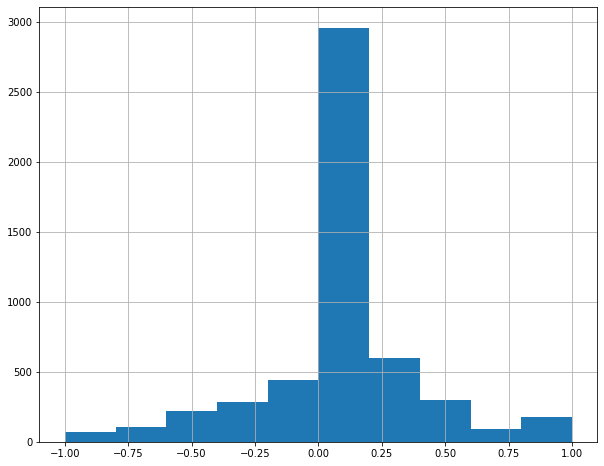

In [729]:
plot_polarity_histogram(nbc_data['original_comment'])

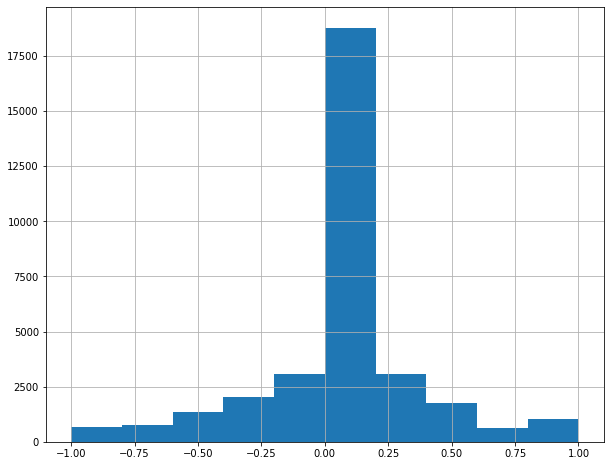

In [730]:
plot_polarity_histogram(fox_data['original_comment'])

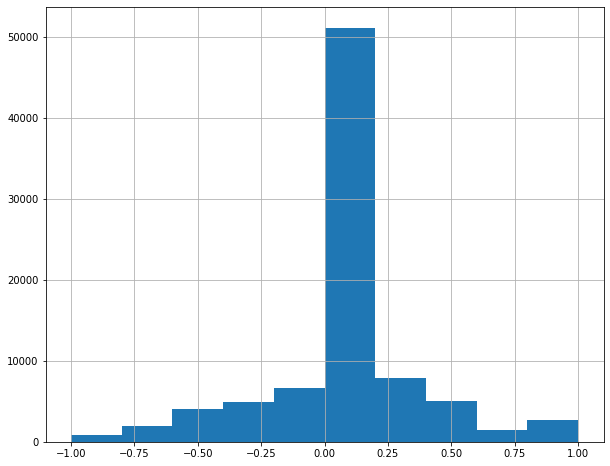

In [731]:
plot_polarity_histogram(cspan_data['original_comment'])

We can take it a step further and see what percentage of each comment section is negative, postive, and neutral

In [712]:
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ezzard\AppData\Roaming\nltk_data...


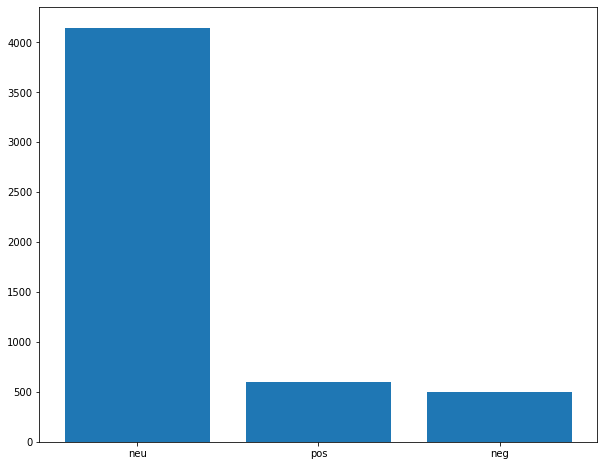

In [732]:
plot_sentiment_barchart(nbc_data['original_comment'], method='Vader')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ezzard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


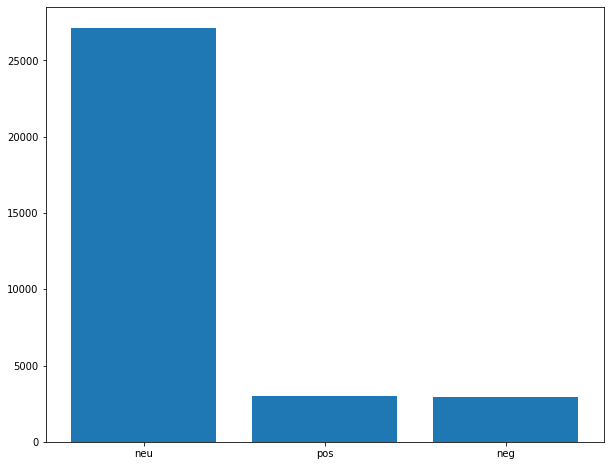

In [733]:
plot_sentiment_barchart(fox_data['original_comment'], method='Vader')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ezzard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


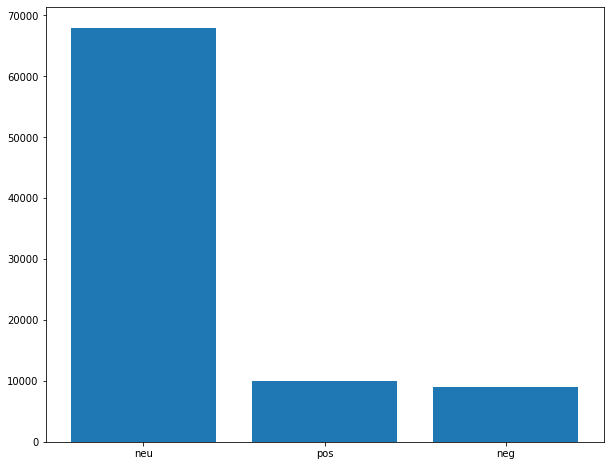

In [734]:
plot_sentiment_barchart(cspan_data['original_comment'], method='Vader')

Now let's examine what comments are considered positive, negative, and neutral for each comment section

In [744]:
nbc_data['polarity'] = nbc_data['original_comment'].apply(sentiment_textblob)
fox_data['polarity'] = nbc_data['original_comment'].apply(sentiment_textblob)
cspan_data['polarity'] = nbc_data['original_comment'].apply(sentiment_textblob)

In [745]:
nbc_data[nbc_data['polarity']=='pos']['original_comment'].head()


8     1:24:58 he’s narcissistic conceited, thought c...
14    trump nazi trying hitler let side talk like tr...
18                                           fantastic.
19                                              superb.
21    trump 2020!we love forever!he great president ...
Name: original_comment, dtype: object

In [746]:
nbc_data[nbc_data['polarity']=='neg']['original_comment'].head()


3                                    need mad bodyguard
6                            hahah ridiculous omg lies!
13    alcoholic laura jekely transport blouse clinic...
15    propose republican taken socialist medical sys...
16                        reporting awful manipulative.
Name: original_comment, dtype: object

In [747]:
nbc_data[nbc_data['polarity']=='neu']['original_comment'].head()


0      trump remembered one term loser impeached twice
1                                   who's inauguration
2               2:9:00 trump condemn white supremacist
4    country cave self go inner city send kamalah s...
5                    don’t let joe biden go inner city
Name: original_comment, dtype: object

In [748]:
fox_data[fox_data['polarity']=='neg']['original_comment'].head()


3                                               25:02 😂
6             17:18 "that really productive segment it"
13                           trump even show win debate
15    i'm give testimony dr brow help bring husband ...
16               chris wallace hypocrite liar fake news
Name: original_comment, dtype: object

In [749]:
fox_data[fox_data['polarity']=='pos']['original_comment'].head()


8     1:34:40 hour hahalf wanna thank both, particip...
14                   like part debating, thanks showing
18    going forward, here's predictable, idiotic use...
19           whoever win always remember biden cheater.
21    unsubscribed fox news. chris wallace owner rui...
Name: original_comment, dtype: object

In [750]:
fox_data[fox_data['polarity']=='neu']['original_comment'].head()


0                         12:45 funny, next president?
1                                         biden commie
2    liberal neither biden trump good sounded like ...
4    44:24 biden: "one day came burped behind me, b...
5    sadly, debate hurt trump bad election rude int...
Name: original_comment, dtype: object

In [751]:
cspan_data[cspan_data['polarity']=='pos']['original_comment'].head()


8                             need nikocado avacado run
14    trump dust bin history. american know piece tr...
18    im watching jan 19th! lololol riden biden brau!!!
19                                        47:24 *wrong*
21                                             shut up!
Name: original_comment, dtype: object

In [752]:
cspan_data[cspan_data['polarity']=='neg']['original_comment'].head()


3                 **watching biden's swearing in!❤️❤️**
6                                                 22:23
13    34:55 wallace gave direction "open discussion"...
15    yeah. inauguration day toast trump getting evi...
16    i'm watching kind late, noticed trump keep int...
Name: original_comment, dtype: object

In [753]:
cspan_data[cspan_data['polarity']=='neu']['original_comment'].head()


0    let serve record history world see disgrace do...
1    wow. crazy watch, without worrying trump still...
2    look yellow think liver disease eating much ju...
4                                      heeeeeeeck yeah
5                                       would shut man
Name: original_comment, dtype: object